In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Variance

$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

### Standard Deviation

$$s = \sqrt{\sigma}^2$$

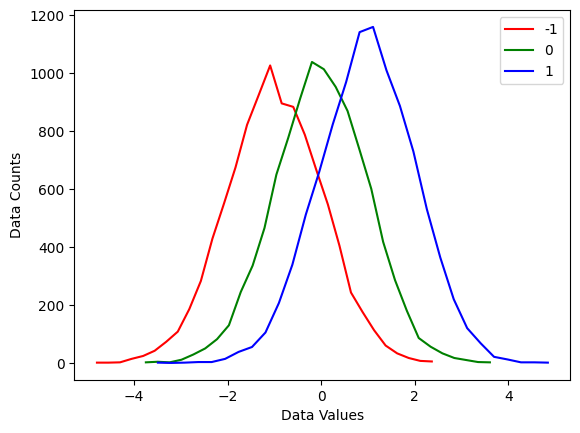

In [2]:
## Create some data distributions

N = 10001
nbins = 30

d1 = np.random.randn(N) - 1
d2 = np.random.randn(N)
d3 = np.random.randn(N) + 1

y1,x1 = np.histogram(d1, bins=nbins)
x1 = (x1[1:] + x1[:-1]) / 2

y2,x2 = np.histogram(d2, bins=nbins)
x2 = (x2[1:] + x2[:-1]) / 2

y3,x3 = np.histogram(d3, bins=nbins)
x3 = (x3[1:] + x3[:-1]) / 2

plt.plot(x1, y1, 'r', label="-1")
plt.plot(x2, y2, 'g', label="0")
plt.plot(x3, y3, 'b', label="1")

plt.legend()
plt.xlabel("Data Values")
plt.ylabel("Data Counts")
plt.show()

In [3]:
meanval = 10.2
stdval = 7.5
numsamp = 123

# this is 
np.random.normal(meanval, stdval, numsamp)

# same thing as this
np.random.randn(numsamp) * stdval + meanval

array([ 2.99517000e+00, -9.45717407e+00, -1.06234387e+01,  1.20848298e+00,
       -3.95216048e+00,  5.66148284e-01,  1.56504947e+01,  7.08115120e+00,
        6.67559502e+00,  7.60107642e+00,  1.14874948e+01,  2.81022598e+01,
        1.82628347e+00,  9.90482490e+00,  1.56401724e+01,  4.05912188e+00,
        7.35473492e+00,  8.53605569e+00, -7.50720633e+00,  4.50292608e+00,
        1.00084957e+01,  6.79308609e+00,  1.65788425e+01,  1.69680858e+01,
        1.50382086e+01, -9.66431331e+00,  1.74918595e+01,  9.50977343e+00,
        1.17143381e+01,  2.19879796e+01,  2.01108234e+01,  1.38478056e+01,
        8.40906531e+00, -5.84236594e-01,  2.19852263e+00,  1.16279057e+01,
        1.84299613e+01, -3.69073686e+00,  4.18781102e+00,  1.60874145e+01,
        2.69398686e+01,  2.33058679e+00,  1.97539397e+01,  1.90313667e+01,
        5.79506582e-01,  7.21230004e-02,  8.96044299e+00,  1.97411356e+01,
        7.59579493e+00,  1.22148312e+00,  1.96845567e+01,  2.19436969e+01,
        8.07566161e+00, -

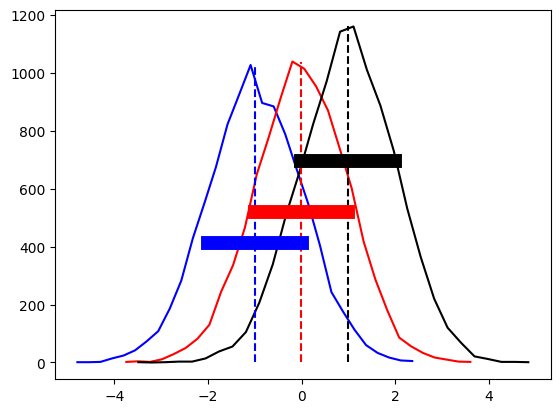

In [ ]:
stds = np.zeros(3)

# by default this compute population standard variation
# by this, it is 
stds[0] = np.std(d1, ddof=1)
stds[1] = np.std(d2, ddof=1)
stds[2] = np.std(d3, ddof=1)

# now plot the means of all dataset in lines
plt.plot(x1,y1,'b',x2,y2,'r',x3,y3,'k')
plt.plot(
  [np.mean(d1),np.mean(d1)],[0,max(y1)], 'b--',
  [np.mean(d2),np.mean(d2)],[0,max(y2)], 'r--',
  [np.mean(d3),np.mean(d3)],[0,max(y3)], 'k--',
)

# now plot the standard deviation
plt.plot(
  [np.mean(d1)-stds[0], np.mean(d1)+stds[0]], [.4*max(y1),.4*max(y1)], 'b', linewidth=10
)
plt.plot(
  [np.mean(d2)-stds[1], np.mean(d2)+stds[1]], [.5*max(y2),.5*max(y2)], 'r', linewidth=10
)
plt.plot(
  [np.mean(d3)-stds[2], np.mean(d3)+stds[2]], [.6*max(y3),.6*max(y3)], 'k', linewidth=10
)

plt.show()

### Plotting Variance, Std, MAD

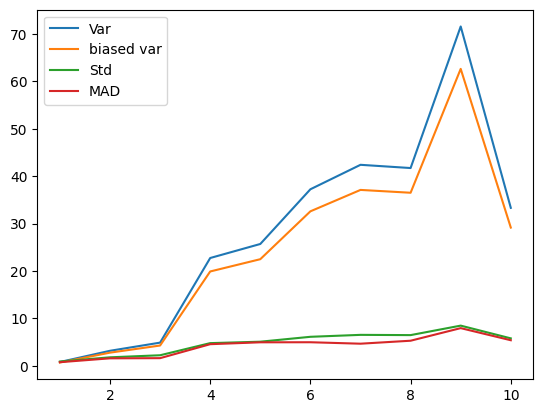

In [ ]:

variances = np.arange(1,11)
N = 8 # 300

varmeasures = np.zeros((4,len(variances)))

for i in range(len(variances)): 
  # create data and mean-center
  data = np.random.randn(N) * variances[i]
  datacent = data - np.mean(data)
  
  # variance: exactly the formula for variance (Sample)
  varmeasures[0,i] = sum(datacent**2) / (N-1)
  
  # "biased" variance (Population)
  varmeasures[1,i] = sum(datacent**2) / N
  
  # standard deviation
  varmeasures[2,i] = np.sqrt( sum(datacent**2) / (N-1) )
  
  # MAD (mean absolute difference)
  varmeasures[3,i] = sum(abs(datacent)) / (N-1)

plt.plot(variances,varmeasures.T)
plt.legend(('Var','biased var','Std','MAD'))
plt.show()

### Related Measures

#### Fano Factor 

$$F = \frac{\sigma^2}{\mu}$$

#### Coefficient of Variation

$$CV = \frac{\sigma}{\mu}$$

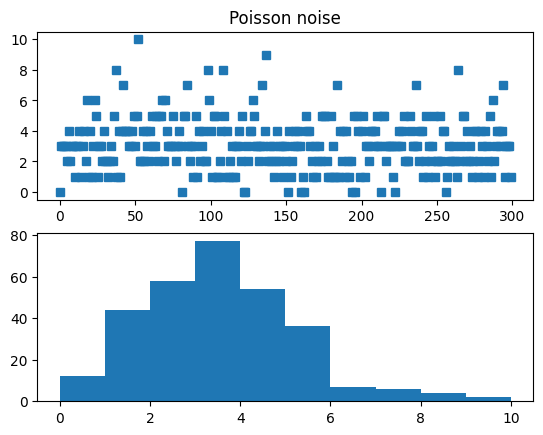

In [27]:
# need positive-valued data (why?)
data = np.random.poisson(3,300)  # "Poisson noise"

fig,ax = plt.subplots(2,1)
ax[0].plot(data,'s')
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()

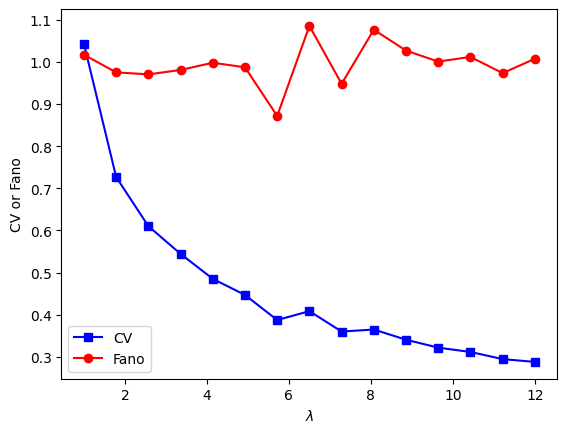

In [ ]:
lambdas = np.linspace(1,12,15)

# initialize output vectors
fano = np.zeros(len(lambdas))
cv   = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    # generate new data
    data = np.random.poisson(lambdas[li],1000)
    # compute the metrics
    cv[li]   = np.std(data) / np.mean(data) # need ddof=1 here?
    fano[li] = np.var(data) / np.mean(data)

# and plot
plt.plot(lambdas,cv,'bs-')
plt.plot(lambdas,fano,'ro-')
plt.legend(('CV','Fano'))
plt.xlabel('$\\lambda$')
plt.ylabel('CV or Fano')
plt.show()